In [2]:
pip install pymysql



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Tasca S8.01. Visualitzacions en Python

## Nivell 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

In [7]:
# Vamos a crear la conexión:
# Parámetros de conexión
username = 'root'
password = 'Erethiel00.'
hostname = 'localhost'
database = 'transactionsv2'

conexion = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
# Crear el motor de la base de datos
engine = create_engine(conexion)

# Crear una sesión
Session = sessionmaker(bind=engine)
session = Session()

# Para almacenar las tablas en data frames, primero necesitaremos el nombre de las tablas:
tabla_nombres= pd.read_sql('show tables',engine)
tabla_nombres




,Tables_in_transactionsv2
0,companies
1,credit_cards
2,estado_tarjetas
3,products
4,transaction_products
5,transactions
6,users


In [8]:
# Utilizamos un bucle para lamacenar las tablas en data frames y crear variables globales:
for nombres in tabla_nombres['Tables_in_transactionsv2']:
    print(nombres)
    query= f"SELECT * FROM {nombres}"
    df= pd.read_sql(query,engine)
    globals()[f'df_{nombres}']=df
    
engine.dispose()

companies
credit_cards
estado_tarjetas
products
transaction_products
transactions
users


In [9]:
def print_dataframe_info(encabezado):
    # Imprimir encabezado de DataFrame
    print("****************************************************************************************************************")
    print(f"Encabezado de: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].head())  # Imprimir los primeros registros del DataFrame
    print("----------------------------------------------------------")
    
    # Imprimir información detallada del DataFrame
    print(f"Información: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].info())
    print("----------------------------------------------------------")
    
    # Imprimir tamaño del DataFrame
    print(f"Tamaño: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].shape)
    print("----------------------------------------------------------")
    
    # Imprimir descripción estadística del DataFrame
    print(f"Descripción: df_{encabezado}")
    print(globals()[f"df_{encabezado}"].describe())
    print("----------------------------------------------------------")

for encabezado in tabla_nombres['Tables_in_transactionsv2']:
    if f"df_{encabezado}" in globals():
        print_dataframe_info(encabezado)
    else:
        print(f"El DataFrame df_{encabezado} no está cargado correctamente en el espacio global.\n")

****************************************************************************************************************
Encabezado de: df_companies
  company_id                 company_name           phone  \
0     b-2222    Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226     Magna A Neque Industries  04 14 44 64 62   
2     b-2230                  Fusce Corp.  08 14 97 58 85   
3     b-2234    Convallis In Incorporated  06 66 57 29 50   
4     b-2238  Ante Iaculis Nec Foundation  08 23 04 99 53   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   
3                mauris.ut@aol.couk        Germany   
4       sed.dictum.proin@outlook.ca    New Zealand   

                            website  
0      https://instagram.com/site\r  
1    https://whatsapp.com/group/9\r  
2  https://pinterest.com/sub/cars\r  
3        https:

In [10]:
# Este análisis exploratorio nos permite detectar algunos errores, por ejemplo, tenemos que cambiar el declined a boolean
#birth date lo podriamos cambiar a fecha para después calcular la edad

df_transactions['declined']= df_transactions['declined'].astype(bool)

df_users['birth_date'] = pd.to_datetime(df_users['birth_date'])


### Exercici 1
Una variable numèrica.

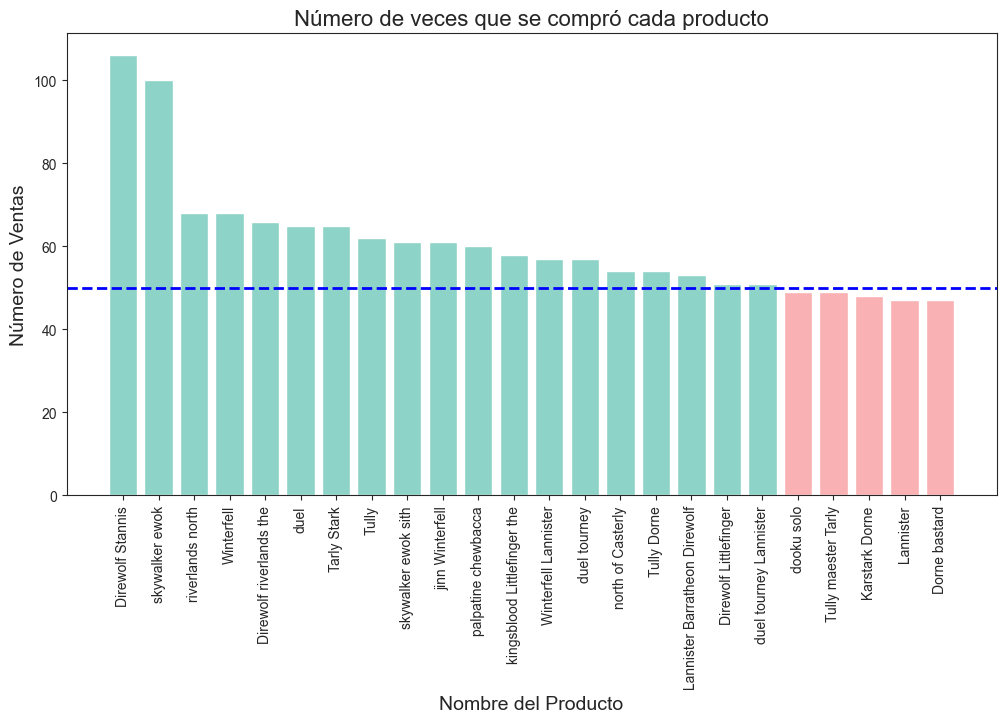

In [11]:
# Quiero graficar el numero de veces que se vendió cada producto. Para eso tenemos que uir las tablas:

df_merged_products_ids = pd.merge(df_transaction_products, df_products, left_on='product_id',right_on='id')
product_counts = df_merged_products_ids['product_name'].value_counts().reset_index()
product_counts.columns = ['product_name', 'num_ventas'] #cambiamos el nombre a las columnas


# Configurar el estilo del gráfico
plt.figure(figsize=(12, 6))
# Colores de las barras basados en el número de ventas
colors = ['#F9B1B3' if x < 50 else '#8DD3C7' for x in product_counts['num_ventas']]

plt.bar(product_counts['product_name'], product_counts['num_ventas'], color = colors)

plt.axhline(y=50, color='blue', linestyle='--', linewidth=2, label='Mínimo de 50 ventas')

# Añadir títulos y etiquetas
plt.title('Número de veces que se compró cada producto', fontsize=16)
plt.xlabel('Nombre del Producto', fontsize=14)
plt.ylabel('Número de Ventas', fontsize=14)

# Rotar las etiquetas del eje x para que no se solapen
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show();


### Exercici 2
Dues variables numèriques.

A través de esta gráfica podemos observar que no hay una relación entre el número de productos que copra un usuario y la cantidad que gasta en la compra.
Quizás se podría ver más claro en un boxplot:

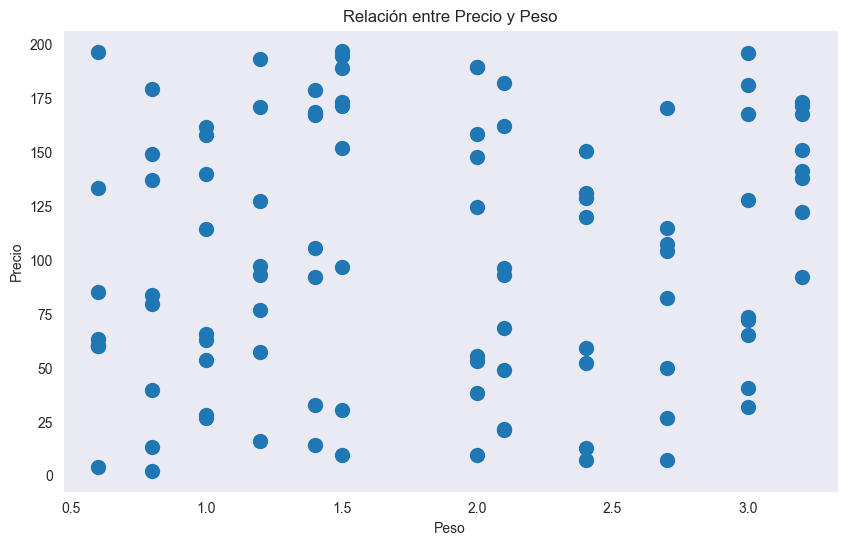

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Obtenemos los datos de los campos 'precio'y 'peso' de la tabla 'products'
precio = df_products['price_usd']
peso = df_products['weight']


# Creamos un DataFrame temporal con los datos
data = pd.DataFrame({'precio': precio, 'peso': peso})

# Ordenamos los datos por 'peso' y luego por 'precio'
data = data.sort_values(by=['peso', 'precio'])

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['peso'], data['precio'], s=100)

plt.xlabel('Peso')       
plt.ylabel('Precio')     
plt.title('Relación entre Precio y Peso')


# Mostramos el gráfico
plt.show();

### Exercici 3
Una variable categòrica.

He decidit graficar la distribució dels usuaris per país.

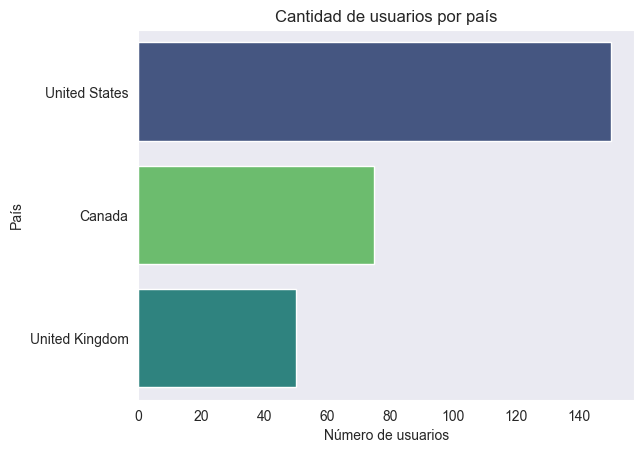

In [ ]:
sns.set_style("dark")

#sns.countplot(data=df_users['country'], palette='viridis')
sns.countplot(data=df_users, order=df_users['country'].value_counts().index, y='country', hue='country', palette='viridis', legend=False)

plt.title('Cantidad de usuarios por país')
plt.xlabel('Número de usuarios')
plt.ylabel('País')
plt.show();


### Exercici 4
Una variable categòrica i una numèrica.



Vamos a graficar el amount por pasís de procedencia de los users

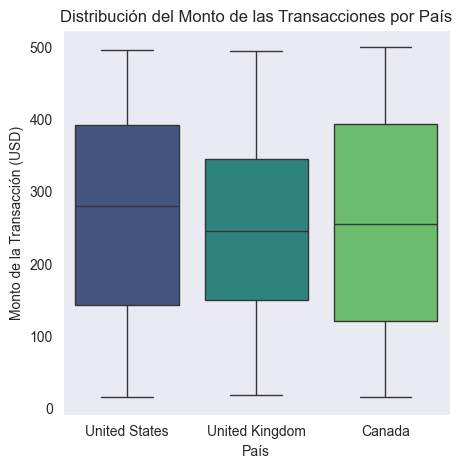

In [ ]:
merge_transactions_users= pd.merge(df_transactions , df_users,left_on='user_id',right_on='id')

plt.figure(figsize=(5, 5))
sns.boxplot(x='country', y='amount', data=merge_transactions_users, hue='country', palette='viridis')
plt.title('Distribución del Monto de las Transacciones por País')
plt.xlabel('País')
plt.ylabel('Monto de la Transacción (USD)')


plt.show();

### Exercici 5
Dues variables categòriques.

Vamos a mostrar las transacciones declinadas por país

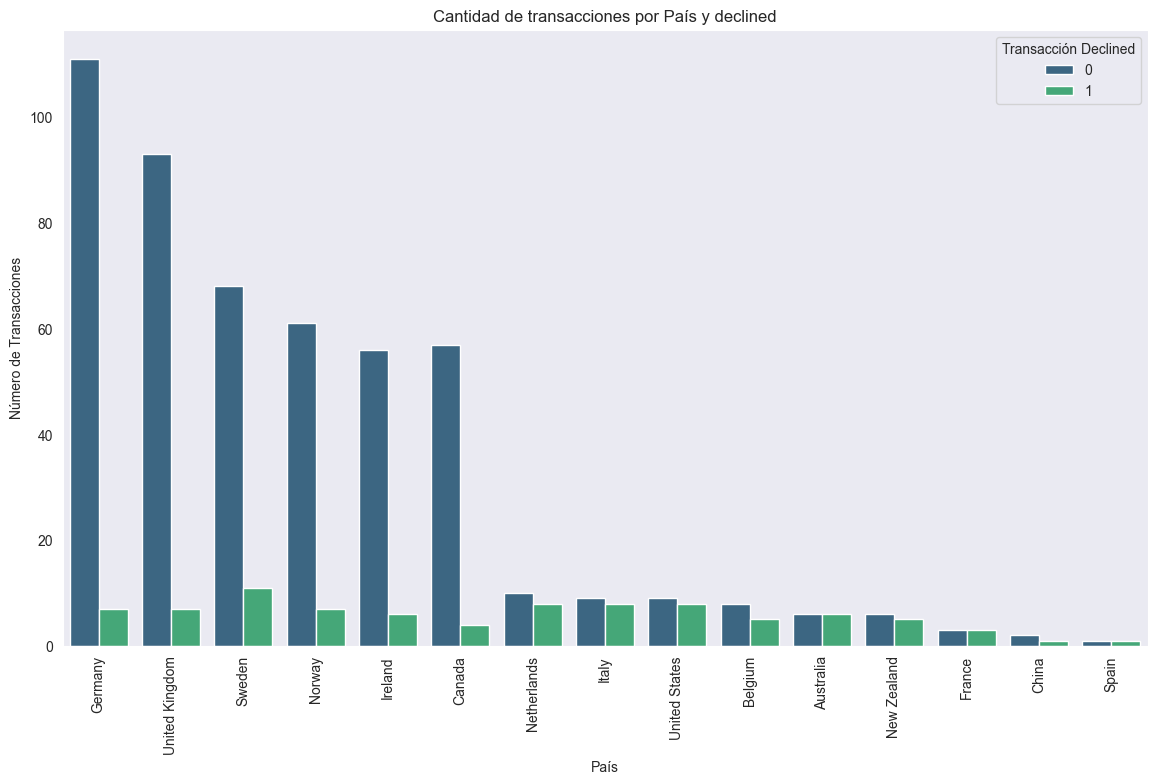

In [ ]:
merge_transactions_companies= pd.merge(df_transactions, df_companies, left_on='business_id', right_on= 'company_id')

# Crear la gráfica de conteo
plt.figure(figsize=(14, 8))
sns.countplot(data=merge_transactions_companies, x='country', hue='declined',order=merge_transactions_companies['country'].value_counts().index, palette='viridis')

plt.title('Cantidad de transacciones por País y declined')
plt.xlabel('País')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=90)
plt.legend(title='Transacción Declined', loc='upper right')

plt.show();

### Exercici 6
Tres variables.

Vamos a mostrar el amount a través del tiempo por país de usuario

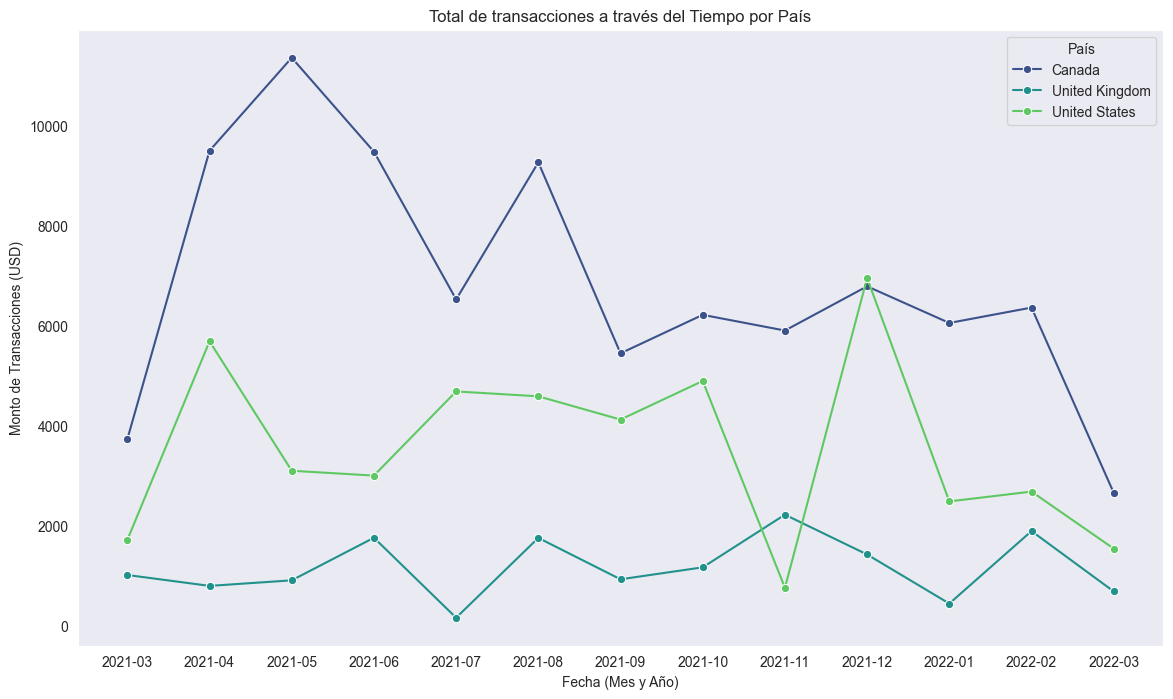

In [ ]:
merge_transactions_users= pd.merge(df_transactions, df_users, left_on='user_id', right_on='id')
# Asegúrate de que la columna de fecha esté en formato datetime
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
# Agregar una nueva columna para el mes y año
df_transactions['month_year'] = df_transactions['timestamp'].dt.to_period('M').astype(str)

# Agrupar los datos por mes y país, calculando el monto total de transacciones por mes
grouped_data = merge_transactions_users.groupby(['month_year', 'country'])['amount'].sum().reset_index()


plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='month_year', y='amount', hue='country', marker='o',palette='viridis')

plt.title('Total de transacciones a través del Tiempo por País')
plt.xlabel('Fecha (Mes y Año)')
plt.ylabel('Monto de Transacciones (USD)')
plt.legend(title='País', loc='upper right')

plt.show();

### Exercici 7

Graficar un Pairplot.



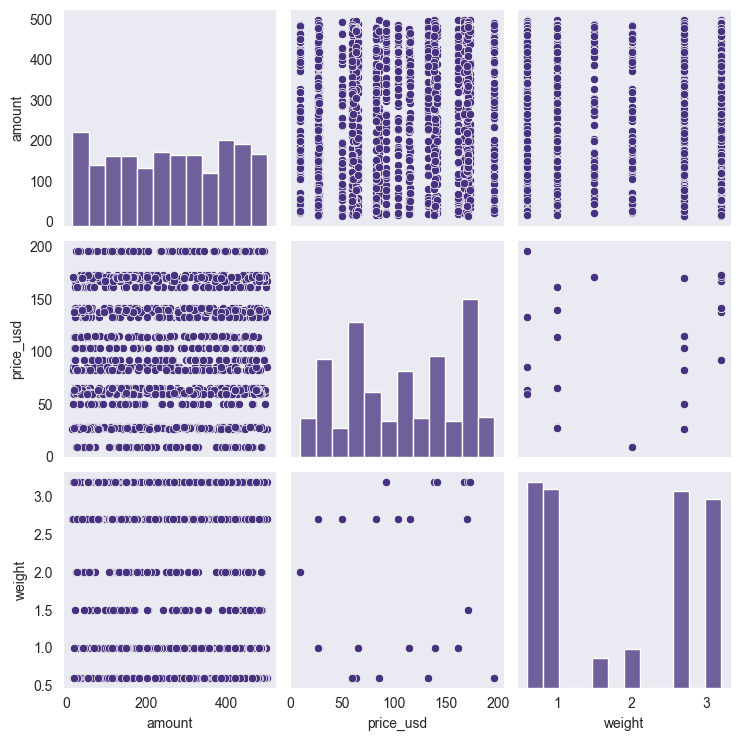

In [ ]:


# Fusionar los DataFrames
#merge_transactions_companies = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')

# Crear un pairplot para 'amount' y 'country'
df_merged_products_ids = pd.merge(df_transaction_products, df_products, left_on='product_id',right_on='id')
merged_transactions_products= pd.merge(left=df_transactions, right=df_merged_products_ids, left_on='id', right_on='transaction_id')
sns.pairplot(data=merged_transactions_products, vars=['amount','price_usd','weight'])



plt.show();


In [ ]:
session.close()

In [ ]:
pip install cryptography


   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB 435.7 kB/s eta 0:00:07
   - -------------------------------------- 0.1/2.9 MB 1.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.3/2.9 MB 1.8 MB/s eta 0:00:02
   ------- -------------------------------- 0.6/2.9 MB 2.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.9 MB 3.7 MB/s eta 0:00:01
   --------------- ------------------------ 1.1/2.9 MB 3.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.4/2.9 MB 4.3 MB/s eta 0:00:01
   ------------------------ --------------- 1.8/2.9 MB 4.8 MB/s eta 0:00:01
   --------------------------- ------------ 2.0/2.9 MB 4.7 MB/s eta 0:00:01
   ------------------------------- -------- 2.3/2.9 MB 4.9 MB/s eta 0:00:01
   ----------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


: 